# Assignment 1
11911839 聂雨荷

## 0. Package Requirement

In [1]:
import numpy as np
import random
from scipy import stats
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame
from sklearn import datasets

## 1. The Perceptron

### 1.1 Task 1
Generate a dataset of points in $R^2$.
To do this, define two Gaussian distributions and sample 200 points from each.
Your dataset should then contain a total of 400 points, 200 from each distribution. Keep 160 points per distribution
as the training (320 in total), 40 for the test (80 in total).

### Generate Sample
generate samples that satisfy the Gaussian Distribution
- mu: $\mu$
- sigma: $\sigma$
- size: sample size
- label: sample label
- flag: display plot or not

In [14]:
def generate_gaussian_sample(mu,sigma, size, label, flag):
    np.random.seed(42)
    data = np.random.multivariate_normal(mu,sigma,size)
    x = [data[i][0] for i in range(len(data))]
    y = [data[i][1] for i in range(len(data))]
    if flag:
        plt.scatter(x,y,c="red")
        plt.title('mu='+ str(mu) + '  sigma='+ str(sigma) + '  label=' + str(label))
        plt.tight_layout()
        plt.show()
    samples = list()
    for i in range(size):
        samples.append([x[i],y[i],label])
    return samples

In [15]:
def generate_data_set(mu1, sigma1, mu2, sigma2, flag):
    samples1 = generate_gaussian_sample(mu1,sigma1,200,1, flag)
    samples2 = generate_gaussian_sample(mu2,sigma2,200,-1,flag)
    data = samples1 + samples2
    train_set, test_set = train_test_split(data, test_size=0.2, random_state=12)
    return train_set, test_set

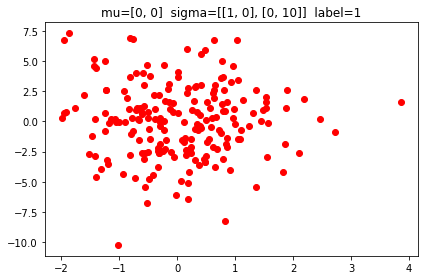

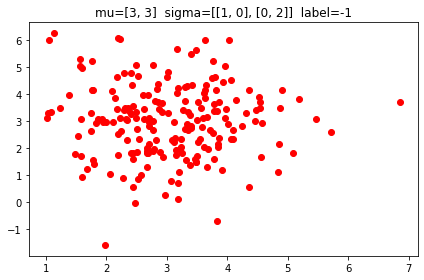

In [16]:
train_set, test_set = generate_data_set([0,0],[[1,0],[0,10]],[3,3],[[1,0],[0,2]],flag=True)

### 1.2 Task 2
Implement the perceptron following the specs in **perceptron.py** and the pseudocode in perceptronslides.pdf.

In [17]:
import perceptron as pe

### 1.3 Task 3
Train the perceptron on the training data (320 points) and test in on the remaining 80 test points. Compute the
classification accuracy on the test set.

In [18]:
def to_input_and_sample(data_set):
    inputs = list()
    labels = list()
    for data in data_set:
        inputs.append([data[0], data[1]])
        labels.append(data[2])
    return inputs, labels

In [19]:
train_inputs, train_labels = to_input_and_sample(train_set)
test_inputs, test_labels = to_input_and_sample(test_set)

In [20]:
p = pe.Perceptron(2)
p.train(train_inputs, train_labels)

In [21]:
def get_accuracy(p, test_inputs, test_labels):
    cnt = 0
    for i in range(len(test_inputs)):
        predict_label = p.forward(test_inputs[i])
        if predict_label == test_labels[i]:
            cnt += 1
    print('The accuracy of the test set is: {}%'.format((cnt/len(test_inputs) * 100)))
    return cnt/len(test_inputs)

In [22]:
acc = get_accuracy(p, test_inputs, test_labels)

The accuracy of the test set is: 95.0%


### 1.4 Task 4
Experiment with different sets of points (generated as described in Task 1). What happens during the training if
the means of the two Gaussians are too close and/or if their variance is too high?

#### Feature1
When two Gaussians are too close, the accuracy is not great

In [94]:
for i in range(10):
    train_set, test_set = generate_data_set([i,i],[[1,0],[0,2]],[10-i, 10-i],[[1,0],[0,2]], flag=False)
    train_inputs, train_labels = to_input_and_sample(train_set)
    test_inputs, test_labels = to_input_and_sample(test_set)
    p = pe.Perceptron(2)
    p.train(train_inputs, train_labels)
    print('mu1 = {}, mu2 = {}'.format([i,i], [10-i,10-i]))
    acc = get_accuracy(p, test_inputs, test_labels)

mu1 = [0, 0], mu2 = [10, 10]
The accuracy of the test set is: 100.0%
mu1 = [1, 1], mu2 = [9, 9]
The accuracy of the test set is: 100.0%
mu1 = [2, 2], mu2 = [8, 8]
The accuracy of the test set is: 100.0%
mu1 = [3, 3], mu2 = [7, 7]
The accuracy of the test set is: 100.0%
mu1 = [4, 4], mu2 = [6, 6]
The accuracy of the test set is: 85.0%
mu1 = [5, 5], mu2 = [5, 5]
The accuracy of the test set is: 57.49999999999999%
mu1 = [6, 6], mu2 = [4, 4]
The accuracy of the test set is: 85.0%
mu1 = [7, 7], mu2 = [3, 3]
The accuracy of the test set is: 98.75%
mu1 = [8, 8], mu2 = [2, 2]
The accuracy of the test set is: 100.0%
mu1 = [9, 9], mu2 = [1, 1]
The accuracy of the test set is: 100.0%


#### Feature2
When two Gaussians have low variance, the accuracy is better 

In [96]:
for i in range(10):
    train_set, test_set = generate_data_set([1,1],[[i,0],[0,i]],[3,3],[[i,0],[0,i]], flag=False)
    train_inputs, train_labels = to_input_and_sample(train_set)
    test_inputs, test_labels = to_input_and_sample(test_set)
    p = pe.Perceptron(2)
    p.train(train_inputs, train_labels)
    print('sigma1 = {}, sigma2 = {}'.format([[i,0],[0,i]], [[i,0],[0,i]]))
    acc = get_accuracy(p, test_inputs, test_labels)

sigma1 = [[0, 0], [0, 0]], sigma2 = [[0, 0], [0, 0]]
The accuracy of the test set is: 100.0%
sigma1 = [[1, 0], [0, 1]], sigma2 = [[1, 0], [0, 1]]
The accuracy of the test set is: 91.25%
sigma1 = [[2, 0], [0, 2]], sigma2 = [[2, 0], [0, 2]]
The accuracy of the test set is: 86.25%
sigma1 = [[3, 0], [0, 3]], sigma2 = [[3, 0], [0, 3]]
The accuracy of the test set is: 83.75%
sigma1 = [[4, 0], [0, 4]], sigma2 = [[4, 0], [0, 4]]
The accuracy of the test set is: 76.25%
sigma1 = [[5, 0], [0, 5]], sigma2 = [[5, 0], [0, 5]]
The accuracy of the test set is: 72.5%
sigma1 = [[6, 0], [0, 6]], sigma2 = [[6, 0], [0, 6]]
The accuracy of the test set is: 63.74999999999999%
sigma1 = [[7, 0], [0, 7]], sigma2 = [[7, 0], [0, 7]]
The accuracy of the test set is: 67.5%
sigma1 = [[8, 0], [0, 8]], sigma2 = [[8, 0], [0, 8]]
The accuracy of the test set is: 72.5%
sigma1 = [[9, 0], [0, 9]], sigma2 = [[9, 0], [0, 9]]
The accuracy of the test set is: 56.25%


## 2. The multi-layer perceptron

### 2.1 Task 1
Implement the MLP architecture by completing the files **mlp numpy.py** and **modules.py**

### 2.2 Task 2
Implement training and testing script in train **mlp numpy.py**. (Please keep **70%** of the dataset for training and
the remaining **30%** for testing. Note that this is a random split of 70% and 30% )


#### You can type this command to execute the train_mlp_numpy

In [ ]:
! python train_mlp_numpy.py --dnn_hidden_units 20,12,6,5 --learning_rate 0.01 --max_steps 300 --eval_freq 10 -- batch 10

### 2.3 Task 3
Using the default values of the parameters, report the results of your experiments using a jupyter notebook where
you show the accuracy curves for both training and test data.

#### You can write down the following code to execute the same function as using command

In [2]:
import train_mlp_numpy

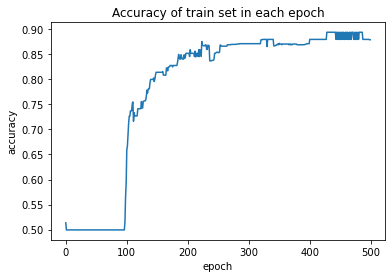

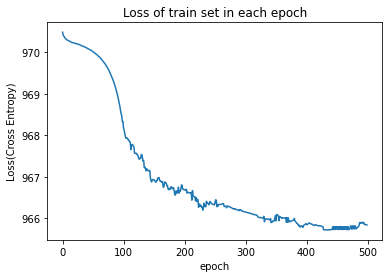

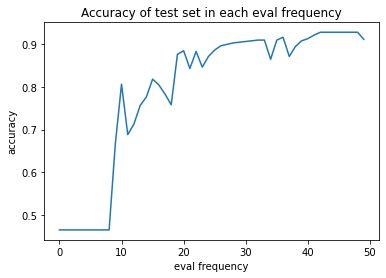

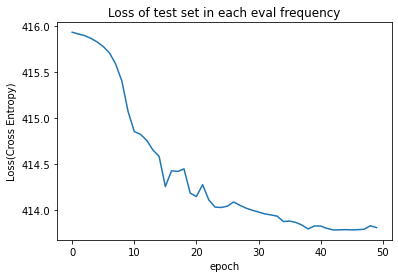

In [3]:
train_mlp_numpy.main()

## 3. Stochastic gradient descent

###  Task 1
Modify the train method in **train_mlp_numpy.py** to accept a parameter that allows the user to specify if the
training has to be performed using batch gradient descent (which you should have implemented in Part II) or
stochastic gradient descent.


#### batch gradient descent

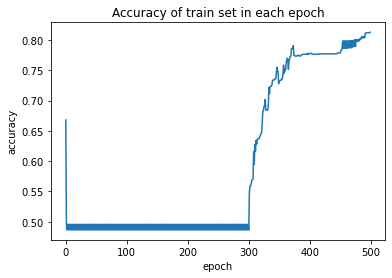

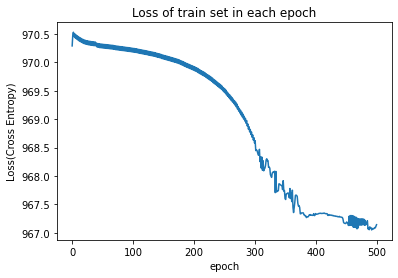

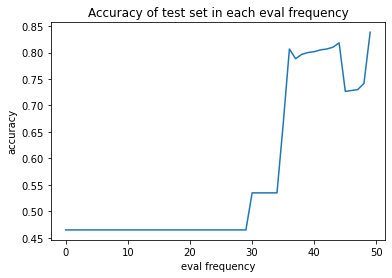

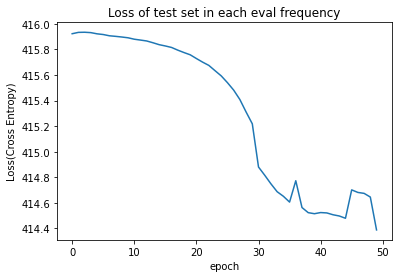

In [6]:
train_mlp_numpy.main(epoch=500,batch=30)

#### stochastic gradient descent

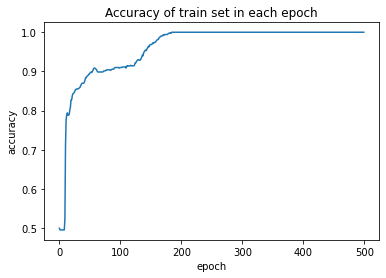

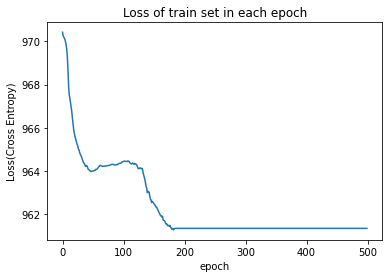

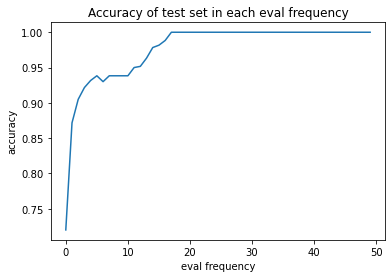

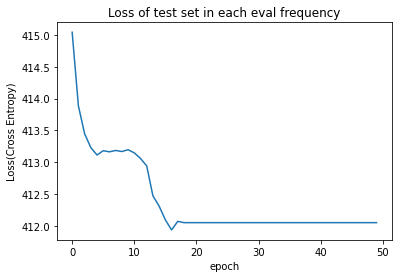

In [4]:
train_mlp_numpy.main(epoch=500,batch=1)

### 3.2 Task 2
Using the default values of the parameters, report the results of your experiments using a jupyter notebook where
you show the accuracy curves for both training and test data.


You can find the figures displayed in the previous statements